# Installing the Data set

In [1]:
! pip install -q kaggle

In [2]:

from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"marwanamk","key":"178d0b0b848d2f96bb9f8bdcf6a66404"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download  'yeanzc/telco-customer-churn-ibm-dataset'

  0% 0.00/1.25M [00:00<?, ?B/s]
100% 1.25M/1.25M [00:00<00:00, 142MB/s]


In [4]:
! unzip 'telco-customer-churn-ibm-dataset.zip'

Archive:  telco-customer-churn-ibm-dataset.zip
  inflating: Telco_customer_churn.xlsx  


# About Dataset
## Context
A fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3.

### Data Description
**7043 observations with 33 variables**

**CustomerID** : A unique ID that identifies each customer.

**Count**: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

**Country**: The country of the customer’s primary residence.

**State**: The state of the customer’s primary residence.

**City**: The city of the customer’s primary residence.

**Zip Code**: The zip code of the customer’s primary residence.

**Lat Long**: The combined latitude and longitude of the customer’s primary residence.

**Latitude**: The latitude of the customer’s primary residence.

**Longitude**: The longitude of the customer’s primary residence.

**Gender**: The customer’s gender: Male, Female

**Senior Citizen**: Indicates if the customer is 65 or older: Yes, No

**Partner**: Indicate if the customer has a partner: Yes, No

**Dependents**: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

**Tenure Months**: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

**Phone Service**: Indicates if the customer subscribes to home phone service with the company: Yes, No

**Multiple Lines**: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

**Internet Service**: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

**Online Security**: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

**Online Backup**: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

**Device Protection**: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

**Tech Support**: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

**Streaming TV**: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Streaming Movies**: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Contract**: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

**Paperless Billing**: Indicates if the customer has chosen paperless billing: Yes, No

**Payment Method**: Indicates how the customer pays their bill: Electronic Check, Mailed Check, Bank transfer(automatic), Credit card(automatic)
**Monthly Charge**: Indicates the customer’s current total monthly charge for all their services from the company.

**Total Charges**: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

**Churn Label**: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

**Churn Value**: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

**Churn Score**: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

**CLTV**: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

**Churn Reason**: A customer’s specific reason for leaving the company. Directly related to Churn Category.

# Problem Defination
In this fictioinal company I'm going to make a new target to predict the customer statisfaction based on the churn score we will going to have 5 categories from the churn score which they are 'Extermly Statisfied', 'Very Satisfied', 'Satisfied', 'Slightly Satisfied', 'Not Satisfied'

## Importing the data

In [5]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
mpl.style.use('ggplot')

In [6]:
df = pd.read_excel('Telco_customer_churn.xlsx')
df.head()

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Total Charges  \
0               Yes               Mailed check            53.85        108.15   
1               Yes           Electronic check            70.70        151.65   
2               Yes           Electronic check            99.65         820.5   
3               Yes           Electronic check           104.80       3046.05   
4               Yes  Bank transfer (automatic)           103.70        5036.3   

  Churn Label Churn Value Churn Score  CLTV                   Churn Reason  
0         Yes           1          86  3239   Competitor made better offer  
1         Yes           1          67  2701                          Moved  
2         Yes           1          86  5372                          Moved  
3         Yes           1          84  5003                          Moved  
4         Yes           1          89  5340  Competitor had better devices  

[5 rows x 33 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

**Why the churn reason has so many missing values?
<br>this will need a further exploration.**

# Statistical Overview of the data 

**Since the Total Charges coloum dtype is object it needed to be changed into numeric dtype to be included in our statistical overview**


In [8]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')


In [ ]:
df.describe()

Count      Zip Code     Latitude    Longitude  Tenure Months  \
count  7043.0   7043.000000  7043.000000  7043.000000    7043.000000   
mean      1.0  93521.964646    36.282441  -119.798880      32.371149   
std       0.0   1865.794555     2.455723     2.157889      24.559481   
min       1.0  90001.000000    32.555828  -124.301372       0.000000   
25%       1.0  92102.000000    34.030915  -121.815412       9.000000   
50%       1.0  93552.000000    36.391777  -119.730885      29.000000   
75%       1.0  95351.000000    38.224869  -118.043237      55.000000   
max       1.0  96161.000000    41.962127  -114.192901      72.000000   

       Monthly Charges  Total Charges  Churn Value  Churn Score         CLTV  
count      7043.000000    7032.000000  7043.000000  7043.000000  7043.000000  
mean         64.761692    2283.300441     0.265370    58.699418  4400.295755  
std          30.090047    2266.771362     0.441561    21.525131  1183.057152  
min          18.250000      18.800000     0.000000     5.000000  2003.000000  
25%          35.500000     401.450000     0.000000    40.000000  3469.000000  
50%          70.350000    1397.475000     0.000000    61.000000  4527.000000  
75%          89.850000    3794.737500     1.000000    75.000000  5380.500000  
max         118.750000    8684.800000     1.000000   100.000000  6500.000000

**From the above overview we can find that the total Charges have 11 missing values also there a possiblilty of finding some outliers  Montlhy Charges, Tenure Months and Total Charges coloumns so we need to check for that**

# Exploratory Analaysis

**Now let's make a function that will enable us to find the outliers in each coloumn**

In [14]:
# This function find outliers by IQR ('Interquartile randge') method
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)

    IQR=q3-q1

    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

    return outliers
column_names = df.columns.values.tolist()
removed = ['CustomerID','Zip Code','Lat Long','Latitude','Longitude']
for col in column_names:
    empt = df[col].isna().sum().sum()
    if empt > 0:
        print(f'number of empty values in {col} = {empt}')
outliers = find_outliers_IQR(df["Monthly Charges"])

print("number of outliers in the Monthly Charges coloumn: "+ str(len(outliers)))

print("max outlier value in the Monthly Charges coloumn: "+ str(outliers.max()))

print("min outlier value in the Monthly Charges coloumn: "+ str(outliers.min()))

outliers = find_outliers_IQR(df["Total Charges"])

print("number of outliers in the Total Charges coloumn: "+ str(len(outliers)))

print("max outlier value in the Total Charges coloumn: "+ str(outliers.max()))

print("min outlier value in the Total Charges coloumn: "+ str(outliers.min()))

outliers = find_outliers_IQR(df["Tenure Months"])

print("number of outliers in the Tenure Months coloumn: "+ str(len(outliers)))

print("max outlier value in the Tenure Months coloumn: "+ str(outliers.max()))

print("min outlier value in the Tenure Months coloumn: "+ str(outliers.min()))
outliers = find_outliers_IQR(df["Churn Score"])

print("number of outliers in the Churn Score coloumn: "+ str(len(outliers)))

print("max outlier value in the Churn Score coloumn: "+ str(outliers.max()))

print("min outlier value in the Churn Score coloumn: "+ str(outliers.min()))
outliers = find_outliers_IQR(df["CLTV"])

print("number of outliers in the CLTV coloumn: "+ str(len(outliers)))

print("max outlier value in the CLTV coloumn: "+ str(outliers.max()))

print("min outlier value in the CLTV coloumn: "+ str(outliers.min()))



number of empty values in Total Charges = 11
number of empty values in Churn Reason = 5174
number of outliers in the Monthly Charges coloumn: 0
max outlier value in the Monthly Charges coloumn: nan
min outlier value in the Monthly Charges coloumn: nan
number of outliers in the Total Charges coloumn: 0
max outlier value in the Total Charges coloumn: nan
min outlier value in the Total Charges coloumn: nan
number of outliers in the Tenure Months coloumn: 0
max outlier value in the Tenure Months coloumn: nan
min outlier value in the Tenure Months coloumn: nan
number of outliers in the Churn Score coloumn: 0
max outlier value in the Churn Score coloumn: nan
min outlier value in the Churn Score coloumn: nan
number of outliers in the CLTV coloumn: 0
max outlier value in the CLTV coloumn: nan
min outlier value in the CLTV coloumn: nan


**Fortunately there is no outliers in the data**

**Lets check if each of the coloumn that contains strings if they have any strange values that shouldn't be in the dataset**

In [ ]:
df['Churn Reason'].isna().sum().sum()

5174

In [ ]:
freq = df.groupby('Churn Value').count()
freq['Count'].head()

Churn Value
0    5174
1    1869
Name: Count, dtype: int64

**This means that the 5174 missing values in the Churn Reason coloumns are for the customers who hadn't left the company yet**


### Checking who many missing values in every coloumn 
#### Then printing the unique values in every coloumn that doesn't have alot of numbers

In [ ]:
column_names = df.columns.values.tolist()
removed = ['CustomerID','Zip Code','Lat Long','Latitude','Longitude','Tenure Months','Churn Score']
for col in column_names:
    empt = df[col].isna().sum().sum()
    if empt > 0:
        print(f'number of empty values in {col} = {empt}')
for remove in removed:
    column_names.remove(remove)
for coloumn in column_names:
    print(f'The {coloumn} unique values are {df[coloumn].unique()} ')

number of empty values in Total Charges = 11
number of empty values in Churn Reason = 5174
The Count unique values are [1] 
The Country unique values are ['United States'] 
The State unique values are ['California'] 
The City unique values are ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley'] 
The Gender unique values are ['Male' 'Female'] 
The Senior Citizen unique values are ['No' 'Yes'] 
The Partner unique values are ['No' 'Yes'] 
The Dependents unique values are ['No' 'Yes'] 
The Phone Service unique values are ['Yes' 'No'] 
The Multiple Lines unique values are ['No' 'Yes' 'No phone service'] 
The Internet Service unique values are ['DSL' 'Fiber optic' 'No'] 
The Online Security unique values are ['Yes' 'No' 'No internet service'] 
The Online Backup unique values are ['Yes' 'No' 'No internet service'] 
The Device Protection unique values are ['No' 'Yes' 'No internet service'] 
The Tech Support unique values are ['No' 'Yes' 'No internet se

**The Total charge coloumn have 11 missing vlaues that we need to deal with in the Prepration phase**

# Data Visualization 

<Axes: title={'center': 'Churn Score Vs Churn Value'}, xlabel='Churn Score', ylabel='Churn Value'>

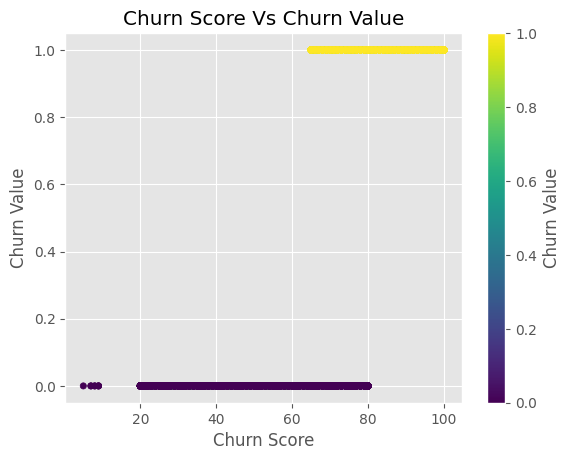

In [ ]:
df.plot.scatter(x='Churn Score', y = 'Churn Value', c = 'Churn Value' ,title = 'Churn Score Vs Churn Value',colormap='viridis')

from this we know that the poper threshold should be 61 where this class  would be slightly disatissfied 

<Axes: title={'center': 'Churn Score Vs Montlhy Charges'}, xlabel='Monthly Charges', ylabel='Churn Score'>

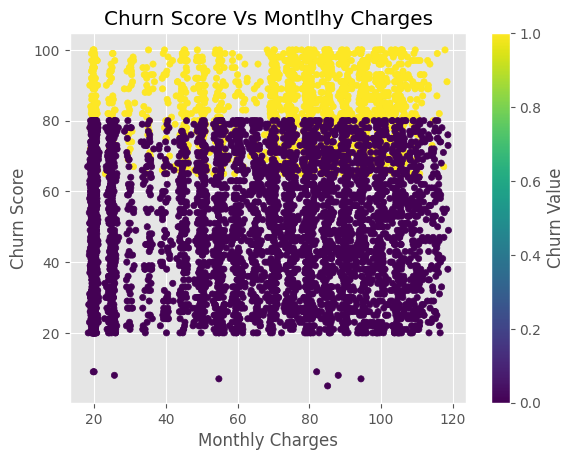

In [ ]:
df.plot.scatter(x='Monthly Charges', y = 'Churn Score', c = 'Churn Value' ,title = 'Churn Score Vs Montlhy Charges',colormap='viridis')

<Axes: title={'center': 'Churn Score Vs Total Charges'}, xlabel='Total Charges', ylabel='Churn Score'>

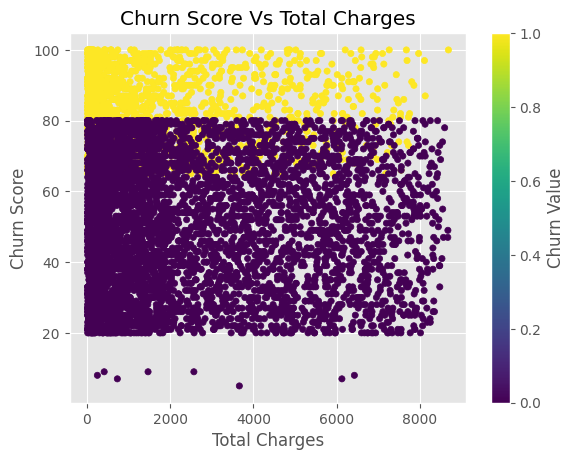

In [ ]:
df.plot.scatter(x='Total Charges', y = 'Churn Score', c = 'Churn Value' ,title = 'Churn Score Vs Total Charges',colormap='viridis')

<Axes: title={'center': 'Churn Score Vs CLTV'}, xlabel='CLTV', ylabel='Churn Score'>

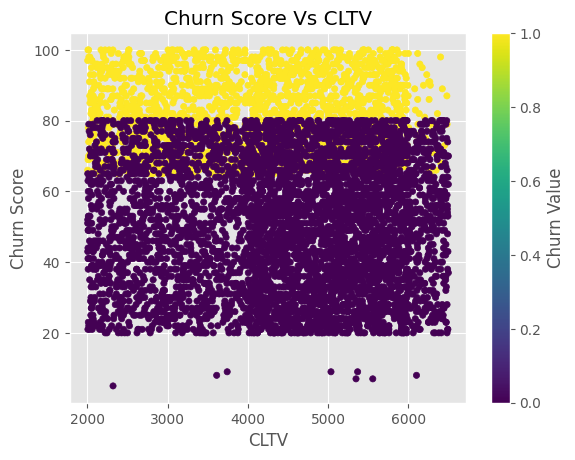

In [ ]:
df.plot.scatter(x='CLTV', y = 'Churn Score', c = 'Churn Value' ,title = 'Churn Score Vs CLTV',colormap='viridis')

<Axes: title={'center': 'Churn Score Vs Tenure Months'}, xlabel='Tenure Months', ylabel='Churn Score'>

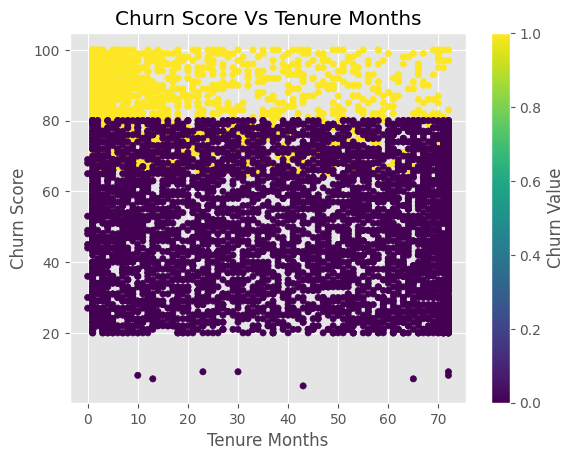

In [ ]:
df.plot.scatter(x='Tenure Months', y = 'Churn Score', c = 'Churn Value' ,title = 'Churn Score Vs Tenure Months',colormap='viridis')

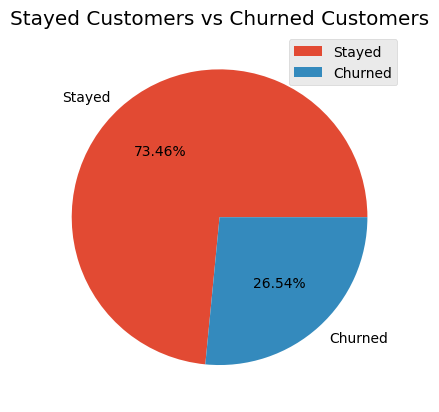

In [ ]:

labels= 'Stayed','Churned'
plt.pie(df['Churn Value'].value_counts(),labels=labels,autopct='%0.02f%%')
plt.title('Stayed Customers vs Churned Customers')
plt.legend()
plt.show()

**This mean that 26.54% of the customer for the telco company move to a commpetator.**

#### Now we want to know what are the reasons that makes customer 26.54% of the customers leave and there order

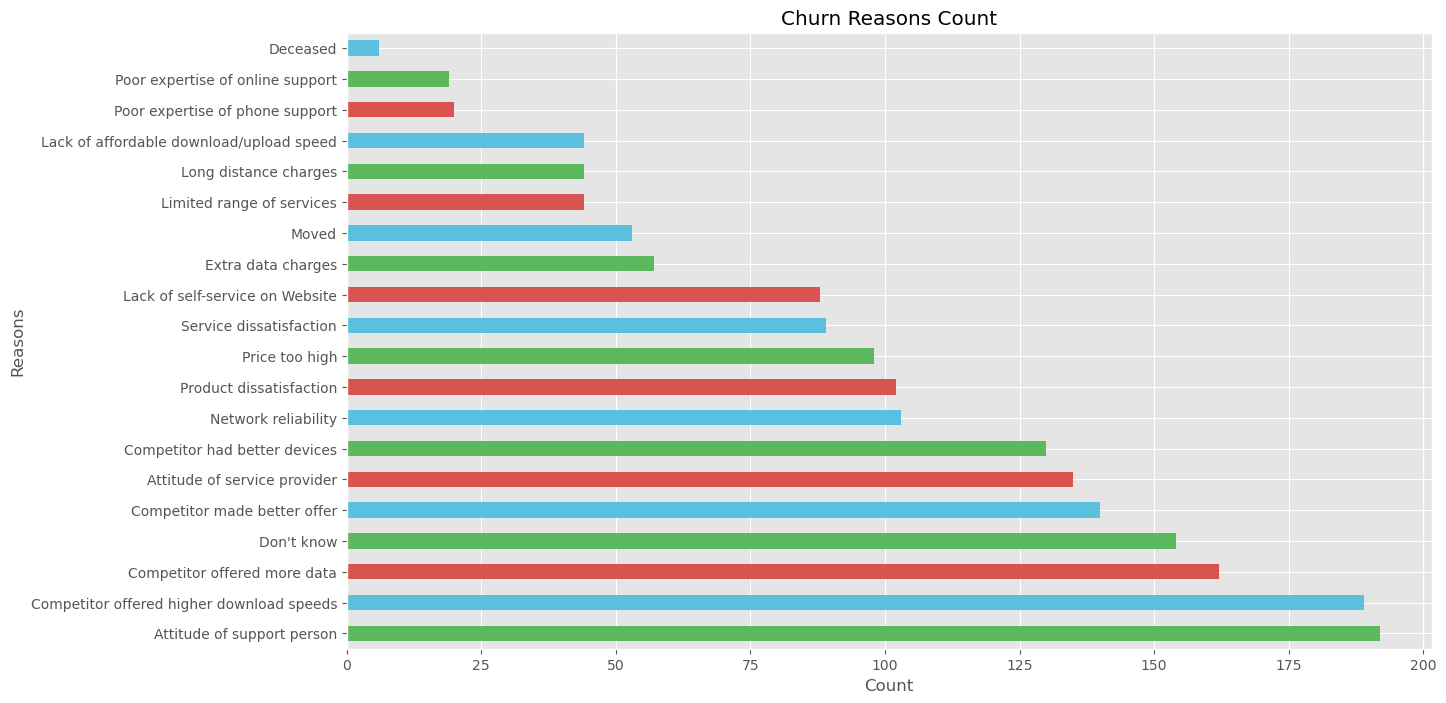

In [ ]:
pl = df['Churn Reason'].value_counts().plot(kind = 'barh',
                                             figsize=(14,8),
                                            title = "Churn Reasons Count", 
                                            color=['#5cb85c','#5bc0de','#d9534f'])
pl.set_ylabel("Reasons")
pl.set_xlabel("Count")
plt.show()

**The number one reason for the customer to leave is the Attitude of the support person**

#### We want to know what are the frequent words in the reasons of the left customers.

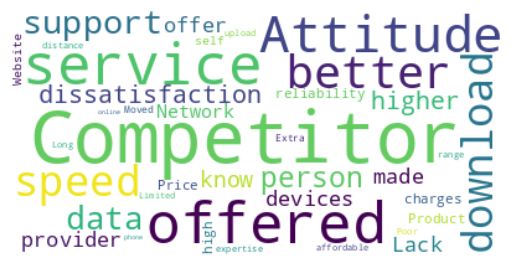

In [9]:
df_copy = df.copy(deep = True)
df_copy.head()
df_copy.dropna(subset = ['Churn Reason'], inplace=True)
df_copy.rename(columns = {'Churn Reason':'Churn_Reason'},inplace = True)

reasons = " ".join(reason for reason in df_copy.Churn_Reason)
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(reasons)
# Display the generated Word Cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**While the most frequent words are Competitor,Attitude and offered**

## Know we want to see if the data is representive between the two genders and not biased toward one geneder to the other

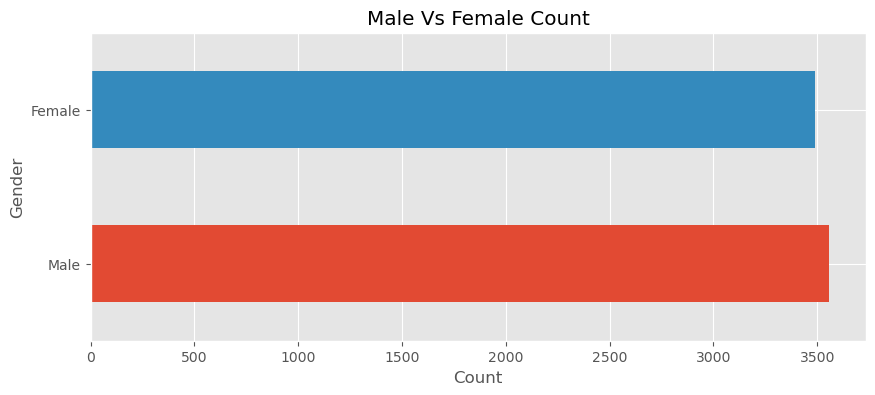

In [ ]:
pl = df['Gender'].value_counts().plot(kind = 'barh',
                                             figsize=(10,4),
                                            title = "Male Vs Female Count", 
                                            color=['#E24A33','#348ABD','#988ED5','#777777'])
pl.set_ylabel("Gender")
pl.set_xlabel("Count")
plt.show()

**The data is fairly distrbuted among the two genders so there is no bias towards one**

## I want to explore to see the porption of each  payment methods, Contracts types and internet sevice types 

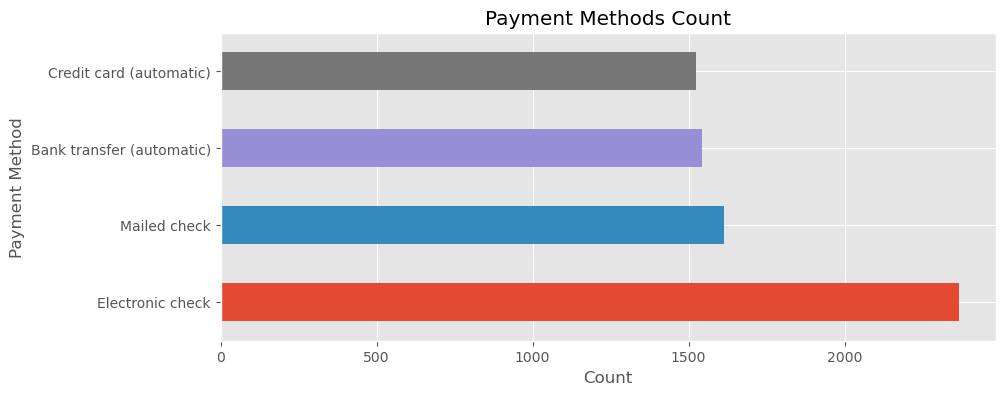

In [ ]:
pl = df['Payment Method'].value_counts().plot(kind = 'barh',
                                             figsize=(10,4),
                                            title = "Payment Methods Count", 
                                            color=['#E24A33','#348ABD','#988ED5','#777777'])
pl.set_ylabel("Payment Method")
pl.set_xlabel("Count")
plt.show()

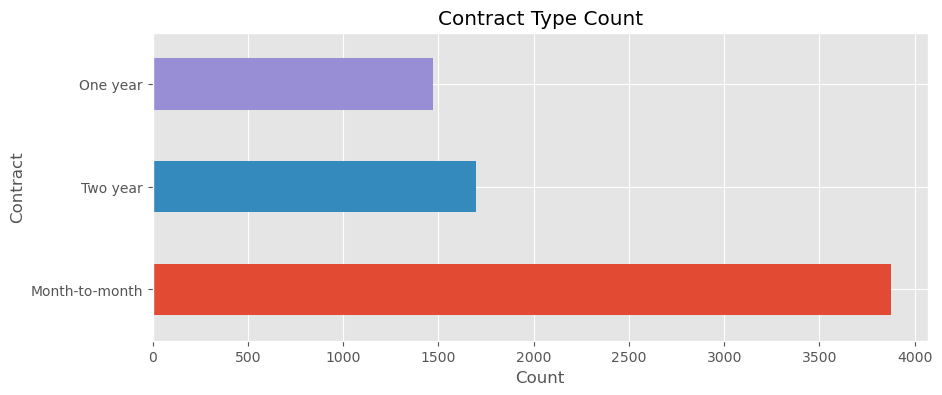

In [ ]:
pl = df['Contract'].value_counts().plot(kind = 'barh',
                                             figsize=(10,4),
                                            title = "Contract Type Count", 
                                            color=['#E24A33','#348ABD','#988ED5','#777777'])
pl.set_ylabel("Contract")
pl.set_xlabel("Count")
plt.show()

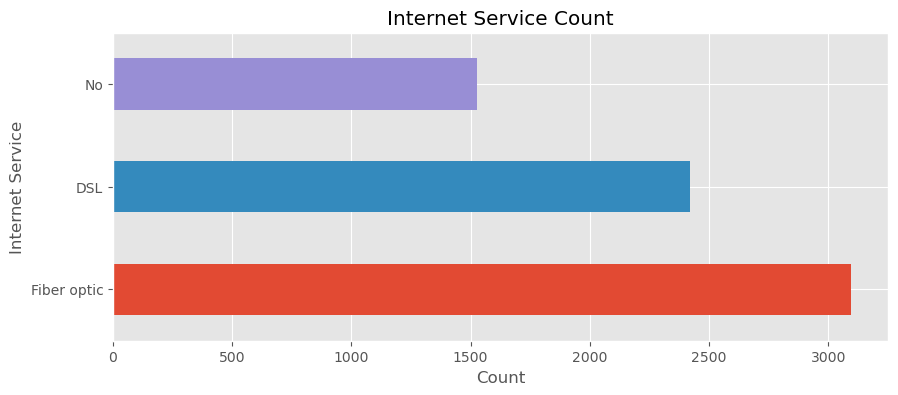

In [ ]:
pl = df['Internet Service'].value_counts().plot(kind = 'barh',
                                             figsize=(10,4),
                                            title = "Internet Service Count", 
                                            color=['#E24A33','#348ABD','#988ED5','#777777'])
pl.set_ylabel("Internet Service")
pl.set_xlabel("Count")
plt.show()


#### Here I wanted to use the longitude and latitude coloumns so I made an interactive map dashboard to for the location of all customers that left the company to know which areas has more unsatisfied customers and if you clicked on the numbers a pointer will apear with reason this particular customer left

In [15]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
california_latitude = 35.458606
california_longitude = -119.355165
cali_map = folium.Map(location = [california_latitude, california_longitude ], zoom_start = 6)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(cali_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_copy.Latitude, df_copy.Longitude, df_copy.Churn_Reason):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
cali_map


In [18]:
cali_map.save("cali_map.jpg")

**There alot of insights that can be concluded from this dashboard one of them is Los Angeles is the highest city of dissatisfied customers**

In [ ]:
df['Country'].unique()

array(['United States'], dtype=object)

In [ ]:
df['State'].unique()

array(['California'], dtype=object)

In [ ]:
cities = df['City'].value_counts()
cities

Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
                 ... 
Healdsburg          4
Jenner              4
Philo               4
Point Arena         4
Olympic Valley      4
Name: City, Length: 1129, dtype: int64

In [ ]:
len(cities)

1129

**We find that the coloumns like state and country will not have any significate impact on our training model where they both have the same value in each row while the city coloum is will be considered as an important feature as there is 1129 different city**

## Now we are going to check to see the distrubtion of the continous value features which they are Monthly Charges, Total Charges, CLTV and Tenure Months.

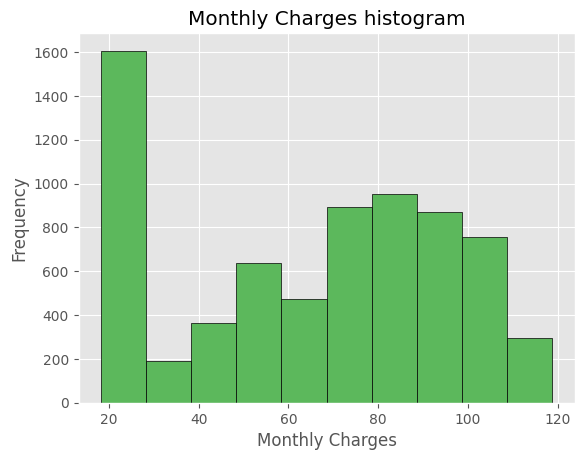

In [19]:
plt.hist(df['Monthly Charges'],edgecolor ='black' , color = '#5cb85c')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Monthly Charges histogram')
plt.show()

**This means that the Montlhy charges is not normally distrbuted and highest range from 20 to 30 dollars subscribtion**

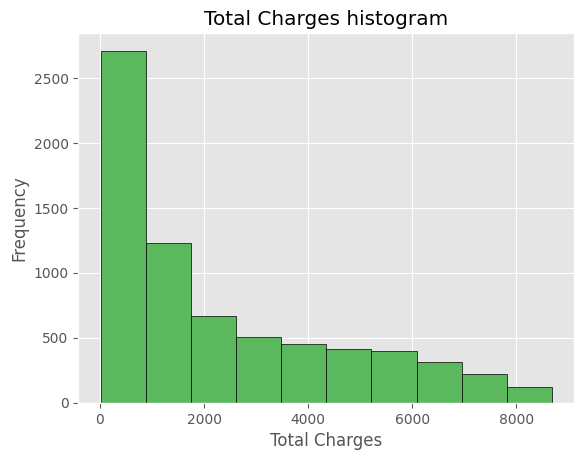

In [20]:
plt.hist(df['Total Charges'],edgecolor ='black' , color = '#5cb85c')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Total Charges histogram')
plt.show()

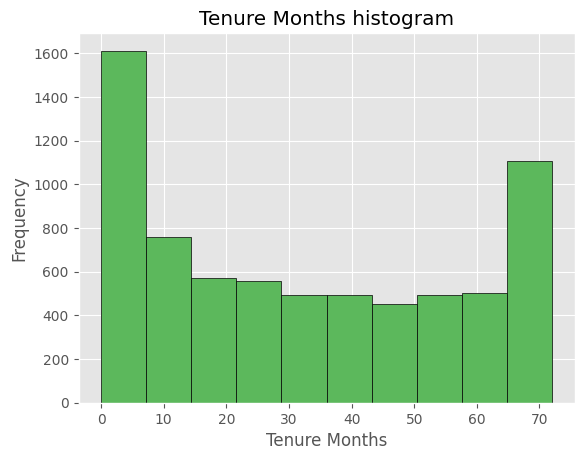

In [21]:
plt.hist(df['Tenure Months'],edgecolor ='black' , color = '#5cb85c')
plt.xlabel('Tenure Months')
plt.ylabel('Frequency')
plt.title('Tenure Months histogram')
plt.show()

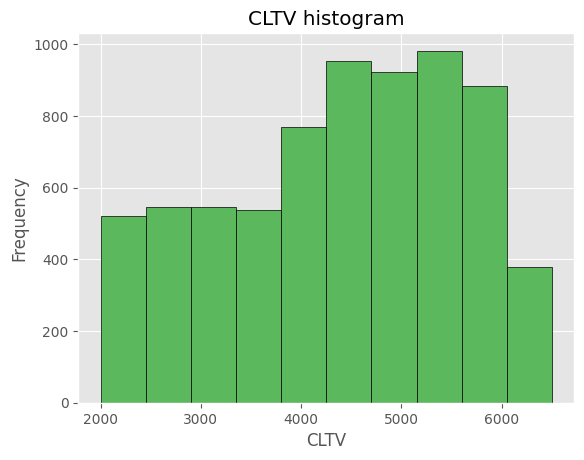

In [22]:
plt.hist(df['CLTV'],edgecolor ='black', color = '#5cb85c')
plt.xlabel('CLTV')
plt.ylabel('Frequency')
plt.title('CLTV histogram')
plt.show()

##### What I have concluded from those 4 histograms that those 4 coloumns will need normalization in the pre-pocessing phase

# Prepration phase

**As the missing values will not directly afect our classification and the data has no outliers and it's close to it's mean so I will replace the 11 missing values with there mean**

In [ ]:
df['Total Charges'].fillna(value= df['Total Charges'].mean(), inplace = True)

In [ ]:
df['Total Charges'].isna().sum().sum()

0

# Pre-Processing & Features Selection
I will drop some features as it will not have any effect on the classification algorithm like CustomerID where every customer will have a unique value so it won't matter, Count where every row in this dataset have count of one so it doesn't have any value, Country and State they are the same for all the values in the dataset,lat long, longitude and latitude coloumns

In [ ]:
df.drop(['Zip Code','CustomerID','Country','State','Lat Long','Latitude','Longitude','Count'],axis=1,inplace = True)

I'm going to do some sentimental analysis here so I'm going to replace every churn reason with a class wether the customer is postive, negative or neutral
and also well replace all the chunr reason missing values with the phrase 'I didn't left I love the sevice'

In [ ]:
df['Churn Reason'] = df['Churn Reason'].replace(np.nan,"I'm staying I love the sevice")



In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [ ]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.3 MB/s eta 0:00:00


In [ ]:

from transformers import pipeline
sentiment = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")
feeling = []
for val in df['Churn Reason']:
    output =sentiment(val)
    x = list(output[0].values())[0]
    feeling.append(x) 




emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [ ]:
df['Customer feeling'] = feeling
df['Customer feeling'].value_counts()


POS    5547
NEU     973
NEG     523
Name: Customer feeling, dtype: int64

## After making the customer feeling coloumn I wouldn't need the churn reason, churn label and the churn value

In [ ]:
df["Customer feeling"] = df["Customer feeling"].astype("object")

In [ ]:
bins = [ 0,62, 80, np.inf]
names = ['Satisfied', 'Slightly Satisfied', 'Not Satisfied']

df['Customer Statisfaction'] = pd.cut(df['Churn Score'], bins, labels=names)
df['Customer Statisfaction'].value_counts()



Satisfied             3630
Slightly Satisfied    2363
Not Satisfied         1050
Name: Customer Statisfaction, dtype: int64

**Now I'm going to change the names isntead of 'Extermly Statisfied', 'Very Satisfied', 'Satisfied', 'Slightly Satisfied'and  'Not Satisfied' to 5,4,3,2 and 1 respectively**

In [ ]:
df.drop(['Churn Reason','Churn Score','Churn Reason','Churn Label'],axis=1, inplace = True)

In [ ]:
df.columns

Index(['City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'CLTV',
       'Customer feeling', 'Customer Statisfaction'],
      dtype='object')

**As we know from above the City coloumn have 1129 unique values so I'm going to keep only the cities that appeared in the data more than 100 times and the other cities will be treated as other**

In [ ]:
 city_countes = df.City.value_counts()
 city_countes[city_countes > 100]

Los Angeles      305
San Diego        150
San Jose         112
Sacramento       108
San Francisco    104
Name: City, dtype: int64

**So now we are going to make a new coloumn that maps Every City in the above list to it's name while the other cities will be referenced as Other**

In [ ]:
city_dict = {
    'Los Angeles': 'Los Angeles',
    'San Diego':'San Diego',
    'Sacramento':'Sacramento',
    'San Francisco': 'San Francisco'
}
df['City'] = df['City'].map(city_dict).fillna('Other')

In [ ]:
df['City'].value_counts()

Other            6376
Los Angeles       305
San Diego         150
Sacramento        108
San Francisco     104
Name: City, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
coloumns = ['City','Gender','Senior Citizen', 'Partner','Dependents','Paperless Billing','Phone Service','Multiple Lines','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies','Internet Service','Contract','Payment Method','Customer feeling']
for col in coloumns:
    encoder = OneHotEncoder()
    encoder_results = encoder.fit_transform(df[[col]])
    cols = []
    for co in encoder.categories_:
        cols.append(co+' '+col)
    df = df.join(pd.DataFrame(encoder_results.toarray(), columns=cols[0]))
# This error happened because I have runed this cell twice other wise there will be no error

#### The last step of our pre-pocessing to normalize all the continous data coloumns Which they are Tenure Months,Monthly Charges	,Total Charges and 	CLTV

In [ ]:
# I will the min-max normalization to make the data from 0-1 scale 
normalize_columns = [ 'Tenure Months','Monthly Charges'	,'Total Charges' , 'CLTV']
for col in normalize_columns:
  df[col] = (df[col] - df[col].min())/(df[col].max() - df[col].min())

In [ ]:

df.drop(coloumns, axis = 1 , inplace = True)

In [ ]:
df.head()


Tenure Months  Monthly Charges  Total Charges  Churn Value      CLTV  \
0       0.027778         0.354229       0.010310            1  0.274850   
1       0.027778         0.521891       0.015330            1  0.155215   
2       0.111111         0.809950       0.092511            1  0.749166   
3       0.388889         0.861194       0.349325            1  0.667111   
4       0.680556         0.850249       0.578987            1  0.742050   

  Customer Statisfaction  Los Angeles City  Other City  Sacramento City  \
0          Not Satisfied               1.0         0.0              0.0   
1     Slightly Satisfied               1.0         0.0              0.0   
2          Not Satisfied               1.0         0.0              0.0   
3          Not Satisfied               1.0         0.0              0.0   
4          Not Satisfied               1.0         0.0              0.0   

   San Diego City  ...  Month-to-month Contract  One year Contract  \
0             0.0  ...                      1.0                0.0   
1             0.0  ...                      1.0                0.0   
2             0.0  ...                      1.0                0.0   
3             0.0  ...                      1.0                0.0   
4             0.0  ...                      1.0                0.0   

   Two year Contract  Bank transfer (automatic) Payment Method  \
0                0.0                                       0.0   
1                0.0                                       0.0   
2                0.0                                       0.0   
3                0.0                                       0.0   
4                0.0                                       1.0   

   Credit card (automatic) Payment Method  Electronic check Payment Method  \
0                                     0.0                              0.0   
1                                     0.0                              1.0   
2                                     0.0                              1.0   
3                                     0.0                              1.0   
4                                     0.0                              0.0   

   Mailed check Payment Method  NEG Customer feeling  NEU Customer feeling  \
0                          1.0                   0.0                   0.0   
1                          0.0                   0.0                   1.0   
2                          0.0                   0.0                   1.0   
3                          0.0                   0.0                   1.0   
4                          0.0                   0.0                   0.0   

   POS Customer feeling  
0                   1.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   1.0  

[5 rows x 57 columns]

# I have tried running the ML algorithms with and without this block of code and
# It gives me the same results

In [ ]:

df['Customer Statisfaction'] = df['Customer Statisfaction'].map({'Extermly Statisfied':1, 'Very Satisfied':2, 'Satisfied':3, 'Slightly Satisfied':4, 'Not Satisfied':5})
df['Customer Statisfaction'] = pd.to_numeric(df['Customer Statisfaction'], errors='coerce')

In [ ]:
X = df.drop(['Churn Value'],axis=1)
Y = df['Churn Value']

In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.3, random_state=42)

In [ ]:
from sklearn.svm import SVC
model= SVC(kernel='linear',C=1.9)
model.fit(x_train,y_train)


SVC(C=1.9, kernel='linear')

In [ ]:
y_pred= model.predict(x_test)  
len(y_pred)
print(y_pred, "test ", y_test)

[1 0 0 ... 0 0 0] test  185     1
2715    0
3825    0
1807    1
132     1
       ..
5522    0
6377    0
5500    0
2392    0
6705    0
Name: Churn Value, Length: 2113, dtype: int64


[[1355  170]
 [ 233  355]]
The accuracy of this model is  80.92759110269758 % 


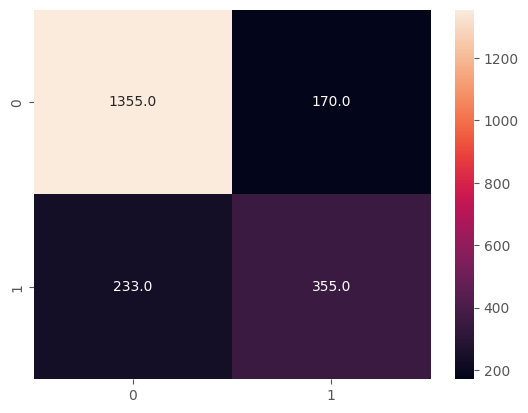

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score


# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)
print(cm)
# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True ,fmt=".1f")

train_accuracy = accuracy_score(y_test, y_pred) *100
print("The accuracy of this model is ",train_accuracy,"% ")

# The ROC and AUC curves for the SVC

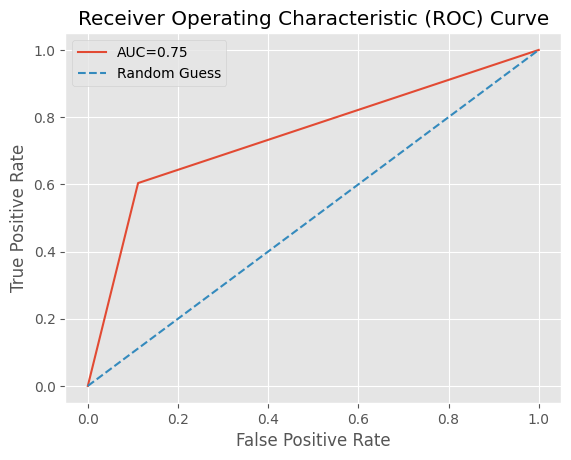

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC={auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

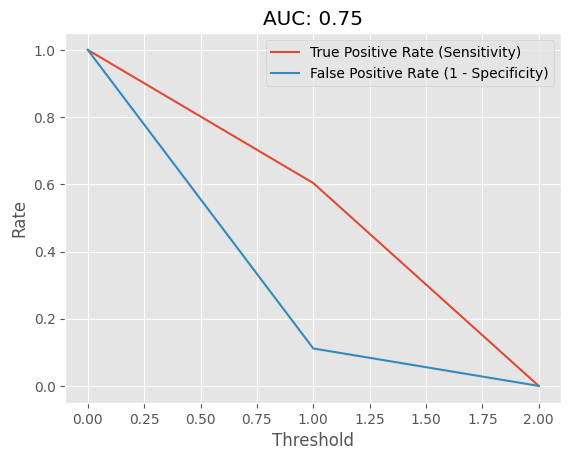

In [ ]:
plt.figure()
plt.plot(thresholds, tpr, label='True Positive Rate (Sensitivity)')
plt.plot(thresholds, fpr, label='False Positive Rate (1 - Specificity)')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title(f'AUC: {auc:.2f}')
plt.legend()
plt.show()

## Logistic regression Confusion matrix, ROC and AUC

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[1353  172]
 [ 230  358]]
The accuracy of this model is  80.97491717936583 % 


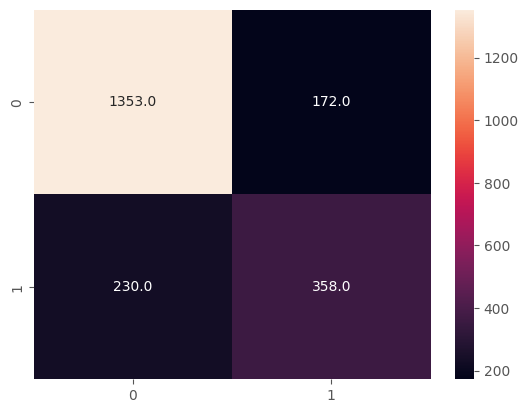

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score


# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)
print(cm)
# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True ,fmt=".1f")

train_accuracy = accuracy_score(y_test, y_pred) *100
print("The accuracy of this model is ",train_accuracy,"% ")

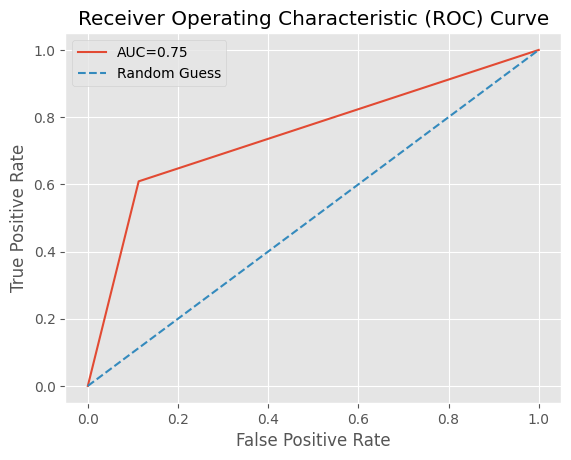

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC={auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

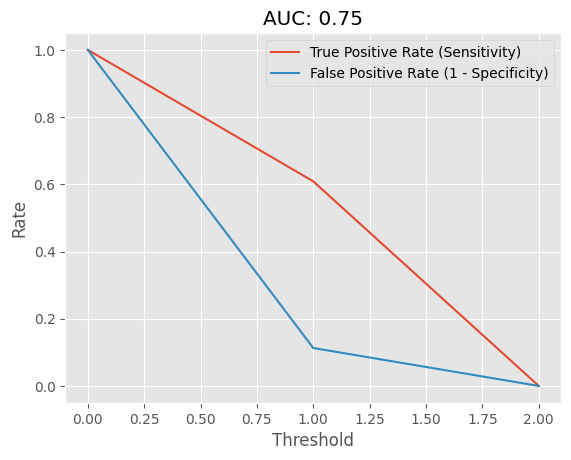

In [ ]:
plt.figure()
plt.plot(thresholds, tpr, label='True Positive Rate (Sensitivity)')
plt.plot(thresholds, fpr, label='False Positive Rate (1 - Specificity)')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title(f'AUC: {auc:.2f}')
plt.legend()
plt.show()

# Know I will try all the different kinds of Ensemble learning to which is the best one

In [ ]:
!pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 13.5 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
def evaluate(model , X, y):
  model.fit(X,y)
  plot_tree(model)

  plt.show()
  plot_decision_regions(X,y,model, legend=2)
  plt.show()
  y_pred=model.predict(x_test)

  print("y_test:", y_test)
  print("y_pred:", y_pred)
  print("accuracy_score:",accuracy_score(y_test,y_pred))
  
  return model

In [ ]:
from sklearn.ensemble import BaggingClassifier
log_reg = LogisticRegression()
svc = SVC()

# Create the bagging classifier
bagging_log_reg = BaggingClassifier(estimator=log_reg, n_estimators=10)
bagging_svc = BaggingClassifier(estimator=svc, n_estimators=10)

# Train the bagging classifiers
bagging_log_reg.fit(x_train, y_train)
bagging_svc.fit(x_train, y_train)

# Evaluate the bagging classifiers
print("Bagging Logistic Regression accuracy:", bagging_log_reg.score(x_test, y_test)*100)
print("Bagging SVC accuracy:", bagging_svc.score(x_test, y_test)*100)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Bagging Logistic Regression accuracy: 81.06956933270232
Bagging SVC accuracy: 80.97491717936583


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[1390  135]
 [ 263  325]]
The accuracy of this model is  81.16422148603881 % 


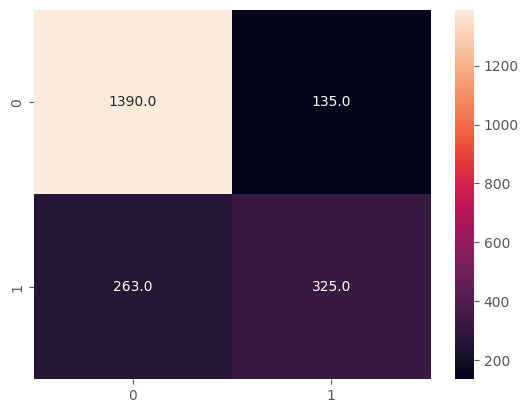

In [ ]:
from sklearn.ensemble import VotingClassifier
m1 = LogisticRegression()
m2 = SVC()
model = VotingClassifier([('lr',m1),('svc',m2)])
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)
print(cm)
# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True ,fmt=".1f")

train_accuracy = accuracy_score(y_test, y_pred) *100
print("The accuracy of this model is ",train_accuracy,"% ")

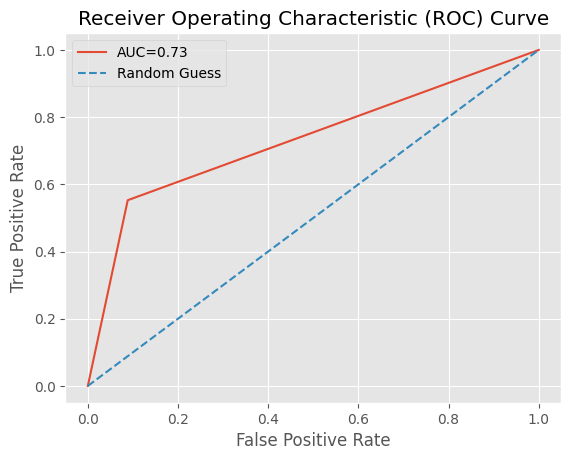

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC={auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

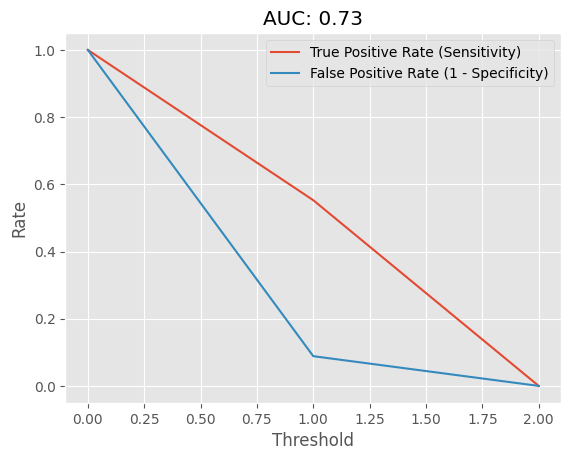

In [ ]:
plt.figure()
plt.plot(thresholds, tpr, label='True Positive Rate (Sensitivity)')
plt.plot(thresholds, fpr, label='False Positive Rate (1 - Specificity)')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title(f'AUC: {auc:.2f}')
plt.legend()
plt.show()

[[1322  203]
 [ 208  380]]
The accuracy of this model is  80.54898248935163 % 


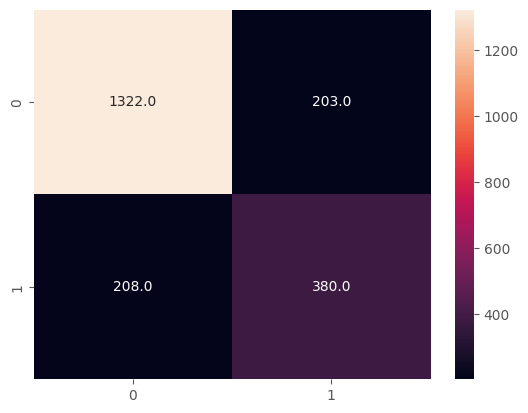

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(n_estimators=10 ,random_state=0)
abc.fit(x_train,y_train)
y_pred=abc.predict(x_test)
# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)
print(cm)
# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True ,fmt=".1f")

train_accuracy = accuracy_score(y_test, y_pred) *100
print("The accuracy of this model is ",train_accuracy,"% ")

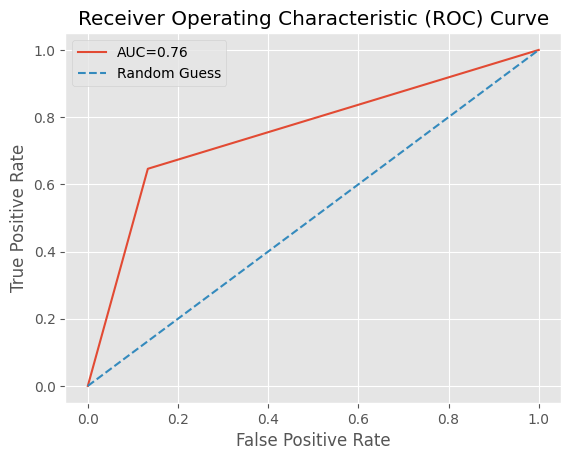

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC={auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

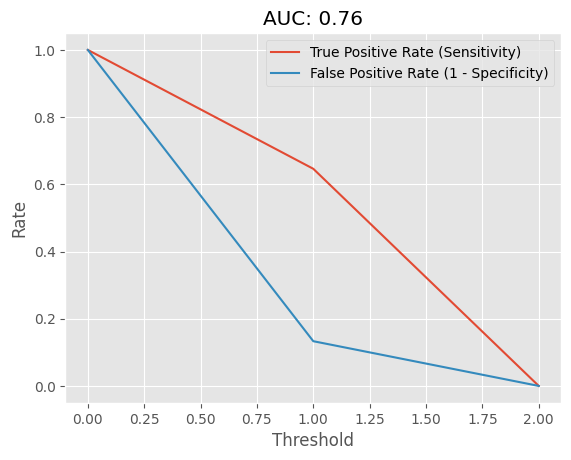

In [ ]:
plt.figure()
plt.plot(thresholds, tpr, label='True Positive Rate (Sensitivity)')
plt.plot(thresholds, fpr, label='False Positive Rate (1 - Specificity)')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title(f'AUC: {auc:.2f}')
plt.legend()
plt.show()

**From the above we found that ensemble stacking/votting have the highest accuracy whil the Boosting have the highest AUC**

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(Dense(1500,input_dim = x_train.shape[1],activation='relu' ))
model.add(Dense(1500,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(800,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))

model.compile(loss='mse', optimizer=optimizers.Adam(0.0001),metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.1)
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100),'%')

Epoch 1/100
70/70 [==============================] - 11s 111ms/step - loss: 0.2406 - accuracy: 0.2430 - val_loss: 0.1905 - val_accuracy: 0.0000e+00
Epoch 2/100
70/70 [==============================] - 8s 111ms/step - loss: 0.2300 - accuracy: 0.2454 - val_loss: 0.1944 - val_accuracy: 0.0000e+00
Epoch 3/100
70/70 [==============================] - 5s 68ms/step - loss: 0.2255 - accuracy: 0.2394 - val_loss: 0.1965 - val_accuracy: 0.0000e+00
Epoch 4/100
70/70 [==============================] - 6s 86ms/step - loss: 0.2211 - accuracy: 0.2488 - val_loss: 0.1954 - val_accuracy: 0.0020
Epoch 5/100
70/70 [==============================] - 5s 76ms/step - loss: 0.2181 - accuracy: 0.2605 - val_loss: 0.1942 - val_accuracy: 0.0101
Epoch 6/100
70/70 [==============================] - 5s 69ms/step - loss: 0.2155 - accuracy: 0.2608 - val_loss: 0.1928 - val_accuracy: 0.0243
Epoch 7/100
70/70 [==============================] - 7s 96ms/step - loss: 0.2149 - accuracy: 0.2421 - val_loss: 0.1913 - val_accuracy

In [ ]:

x = df.drop(['Customer Statisfaction','Churn Value'],axis=1)
y = df['Customer Statisfaction']
x.head()

Tenure Months  Monthly Charges  Total Charges      CLTV  Los Angeles City  \
0       0.027778         0.354229       0.010310  0.274850               1.0   
1       0.027778         0.521891       0.015330  0.155215               1.0   
2       0.111111         0.809950       0.092511  0.749166               1.0   
3       0.388889         0.861194       0.349325  0.667111               1.0   
4       0.680556         0.850249       0.578987  0.742050               1.0   

   Other City  Sacramento City  San Diego City  San Francisco City  \
0         0.0              0.0             0.0                 0.0   
1         0.0              0.0             0.0                 0.0   
2         0.0              0.0             0.0                 0.0   
3         0.0              0.0             0.0                 0.0   
4         0.0              0.0             0.0                 0.0   

   Female Gender  ...  Month-to-month Contract  One year Contract  \
0            0.0  ...                      1.0                0.0   
1            1.0  ...                      1.0                0.0   
2            1.0  ...                      1.0                0.0   
3            1.0  ...                      1.0                0.0   
4            0.0  ...                      1.0                0.0   

   Two year Contract  Bank transfer (automatic) Payment Method  \
0                0.0                                       0.0   
1                0.0                                       0.0   
2                0.0                                       0.0   
3                0.0                                       0.0   
4                0.0                                       1.0   

   Credit card (automatic) Payment Method  Electronic check Payment Method  \
0                                     0.0                              0.0   
1                                     0.0                              1.0   
2                                     0.0                              1.0   
3                                     0.0                              1.0   
4                                     0.0                              0.0   

   Mailed check Payment Method  NEG Customer feeling  NEU Customer feeling  \
0                          1.0                   0.0                   0.0   
1                          0.0                   0.0                   1.0   
2                          0.0                   0.0                   1.0   
3                          0.0                   0.0                   1.0   
4                          0.0                   0.0                   0.0   

   POS Customer feeling  
0                   1.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   1.0  

[5 rows x 55 columns]

In [ ]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# Apply feature selection
selector = SelectKBest(f_classif, k=15)
x = selector.fit_transform(x, y)


In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=42) 

In [ ]:


x_train

Tenure Months  Monthly Charges  Total Charges      CLTV  \
1695       0.708333         0.589552       0.437174  0.832777   
1095       0.513889         0.102985       0.110172  0.539471   
3889       0.152778         0.019900       0.021832  0.451190   
3667       0.416667         0.372139       0.188674  0.765399   
2902       0.916667         0.070149       0.190976  0.893040   
...             ...              ...            ...       ...   
3772       0.583333         0.817413       0.494444  0.280632   
5191       0.541667         0.024378       0.085812  0.384701   
5226       0.263889         0.019403       0.042534  0.626640   
5390       0.486111         0.016418       0.074683  0.073605   
860        0.430556         0.847761       0.351679  0.752502   

      Los Angeles City  Other City  Sacramento City  San Diego City  \
1695               0.0         0.0              1.0             0.0   
1095               0.0         1.0              0.0             0.0   
3889               0.0         1.0              0.0             0.0   
3667               0.0         1.0              0.0             0.0   
2902               0.0         1.0              0.0             0.0   
...                ...         ...              ...             ...   
3772               0.0         0.0              0.0             0.0   
5191               0.0         1.0              0.0             0.0   
5226               0.0         1.0              0.0             0.0   
5390               0.0         0.0              1.0             0.0   
860                0.0         1.0              0.0             0.0   

      San Francisco City  Female Gender  ...  Month-to-month Contract  \
1695                 0.0            1.0  ...                      1.0   
1095                 0.0            1.0  ...                      1.0   
3889                 0.0            0.0  ...                      1.0   
3667                 0.0            0.0  ...                      0.0   
2902                 0.0            0.0  ...                      0.0   
...                  ...            ...  ...                      ...   
3772                 1.0            1.0  ...                      0.0   
5191                 0.0            1.0  ...                      0.0   
5226                 0.0            0.0  ...                      0.0   
5390                 0.0            0.0  ...                      0.0   
860                  0.0            0.0  ...                      0.0   

      One year Contract  Two year Contract  \
1695                0.0                0.0   
1095                0.0                0.0   
3889                0.0                0.0   
3667                0.0                1.0   
2902                0.0                1.0   
...                 ...                ...   
3772                0.0                1.0   
5191                0.0                1.0   
5226                0.0                1.0   
5390                1.0                0.0   
860                 1.0                0.0   

      Bank transfer (automatic) Payment Method  \
1695                                       0.0   
1095                                       0.0   
3889                                       0.0   
3667                                       0.0   
2902                                       0.0   
...                                        ...   
3772                                       0.0   
5191                                       0.0   
5226                                       0.0   
5390                                       0.0   
860                                        0.0   

      Credit card (automatic) Payment Method  Electronic check Payment Method  \
1695                                     0.0                              1.0   
1095                                     1.0                              0.0   
3889                                     0.0                              0.0   
3667             

# DecisionTree for the multiclassclassification 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create a desicisonTreeClassifier object
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(x_test)

[[149  35 130]
 [ 31 681 336]
 [150 335 266]]
The accuracy of multiclass classification decision tree is  51.86938002839565 % 


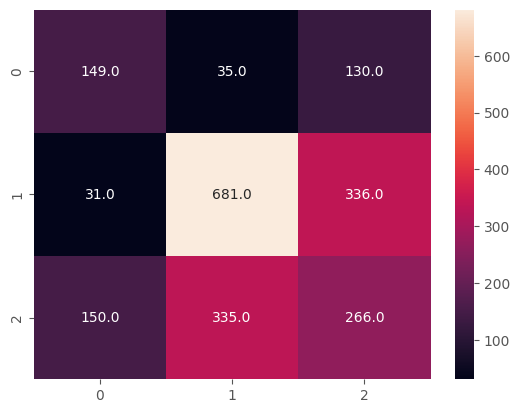

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score


# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)
print(cm)
# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True ,fmt=".1f")

train_accuracy = accuracy_score(y_test, y_pred) *100
print("The accuracy of multiclass classification decision tree is ",train_accuracy,"% ")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[ 224   61   29]
 [   0 1048    0]
 [ 188  545   18]]
The accuracy of this model is  61.050638902035026 % 


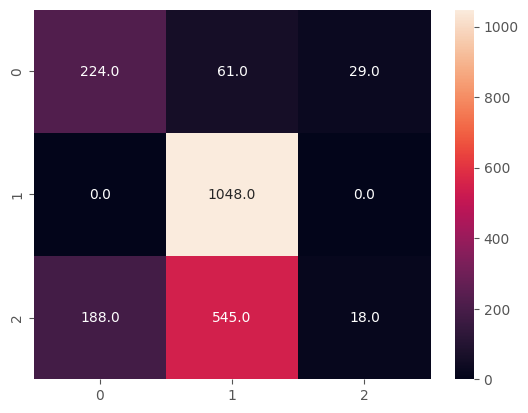

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
m1 = LogisticRegression()
m2 = SVC()
m3 = DecisionTreeClassifier()
model = VotingClassifier([('lr',m1),('svc',m2),('dt',m3)])
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)
print(cm)
# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True ,fmt=".1f")

train_accuracy = accuracy_score(y_test, y_pred) *100
print("The accuracy of this Ensemble learning  stacking is ",train_accuracy,"% ")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Train a random forest model 
rf = RandomForestClassifier(n_estimators=100, max_depth=2)
rf.fit(x_train, y_train)

# Use AdaBoost to boost the random forest
ada_boost = AdaBoostClassifier(base_estimator=rf, n_estimators=200)
ada_boost.fit(x_train, y_train)
rf_score = rf.score(x_test, y_test)
ada_boost_score = ada_boost.score(x_test, y_test)

print("Random Forest score: ", rf_score)
print("AdaBoosted Forest score: ", ada_boost_score)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Random Forest score:  0.6010411736867014
AdaBoosted Forest score:  0.5641268338854709


[[  90   68  156]
 [   0 1048    0]
 [  72  547  132]]
The accuracy of this Ensemble learning  stacking is  60.10411736867014 % 


Text(0.5, 1.0, 'Confusion Matrix for the Random Forest algo')

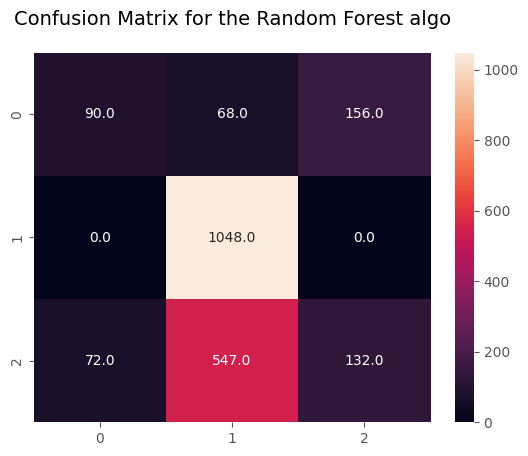

In [ ]:
rf_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, rf_pred)
print(cm)
# true write data values in each cell of the matrix
train_accuracy = accuracy_score(y_test, rf_pred) *100
print("The accuracy of this Ensemble learning  stacking is ",train_accuracy,"% ")
ax =sns.heatmap(cm, annot=True ,fmt=".1f")
ax.set_title("Confusion Matrix for the Random Forest algo", fontsize=14, pad=20)

[[167  47 100]
 [ 13 919 116]
 [161 484 106]]
The accuracy of this Ensemble learning  boosting is  56.412683388547094 % 


Text(0.5, 1.0, 'Confusion Matrix for the Ensemble Boosting Random Forest algo')

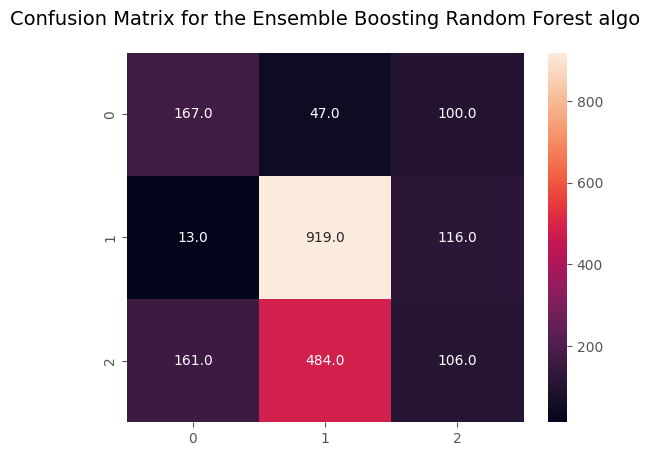

In [ ]:
ada_pred = ada_boost.predict(x_test)
cm = confusion_matrix(y_test, ada_pred)
print(cm)
# true write data values in each cell of the matrix
train_accuracy = accuracy_score(y_test, ada_pred) *100
print("The accuracy of this Ensemble learning  boosting is ",train_accuracy,"% ")
ax =sns.heatmap(cm, annot=True ,fmt=".1f")
ax.set_title("Confusion Matrix for the Ensemble Boosting Random Forest algo", fontsize=14, pad=20)

### This project is still under development I'm just uploaded it to show my skills
